In [15]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [16]:
wifidf = pd.read_csv('wifidfnew.csv')

In [17]:
validationdf = pd.read_csv('validationdfnew.csv')

In [18]:
#features
X_train = pd.concat([wifidf.iloc[:, 1:521], wifidf.iloc[:, 524]], axis=1)
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [19]:
y_train = wifidf.iloc[:, 521]
y_train.head()

0   -7541.2643
1   -7536.6212
2   -7519.1524
3   -7524.5704
4   -7632.1436
Name: LONGITUDE, dtype: float64

In [20]:
#Testing Set (X Testing)
X_validation = pd.concat([validationdf.iloc[:, 1:521], validationdf.iloc[:, 524]], axis=1)
X_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


In [21]:
list(X_validation.columns)

['WAP001',
 'WAP002',
 'WAP003',
 'WAP004',
 'WAP005',
 'WAP006',
 'WAP007',
 'WAP008',
 'WAP009',
 'WAP010',
 'WAP011',
 'WAP012',
 'WAP013',
 'WAP014',
 'WAP015',
 'WAP016',
 'WAP017',
 'WAP018',
 'WAP019',
 'WAP020',
 'WAP021',
 'WAP022',
 'WAP023',
 'WAP024',
 'WAP025',
 'WAP026',
 'WAP027',
 'WAP028',
 'WAP029',
 'WAP030',
 'WAP031',
 'WAP032',
 'WAP033',
 'WAP034',
 'WAP035',
 'WAP036',
 'WAP037',
 'WAP038',
 'WAP039',
 'WAP040',
 'WAP041',
 'WAP042',
 'WAP043',
 'WAP044',
 'WAP045',
 'WAP046',
 'WAP047',
 'WAP048',
 'WAP049',
 'WAP050',
 'WAP051',
 'WAP052',
 'WAP053',
 'WAP054',
 'WAP055',
 'WAP056',
 'WAP057',
 'WAP058',
 'WAP059',
 'WAP060',
 'WAP061',
 'WAP062',
 'WAP063',
 'WAP064',
 'WAP065',
 'WAP066',
 'WAP067',
 'WAP068',
 'WAP069',
 'WAP070',
 'WAP071',
 'WAP072',
 'WAP073',
 'WAP074',
 'WAP075',
 'WAP076',
 'WAP077',
 'WAP078',
 'WAP079',
 'WAP080',
 'WAP081',
 'WAP082',
 'WAP083',
 'WAP084',
 'WAP085',
 'WAP086',
 'WAP087',
 'WAP088',
 'WAP089',
 'WAP090',
 'WAP091',

In [22]:
#Ground Truth (y_test) 
y_validation = validationdf.iloc[:, 521]
y_validation_count = len(y_validation.index)
print('The number of observations in the Y training set are:',str(y_validation_count))
y_validation.head()

The number of observations in the Y training set are: 1111


0   -7515.916799
1   -7383.867221
2   -7374.302080
3   -7365.824883
4   -7641.499303
Name: LONGITUDE, dtype: float64

In [23]:
X_train.shape, X_validation.shape

((19937, 521), (1111, 521))

In [24]:
#Models
modelknn = neighbors.KNeighborsRegressor(n_neighbors = 3)
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [25]:
modelknn.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelRF.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
modelknn.score(X_train,y_train)

0.9983026577788683

In [27]:
modelRF.score(X_train,y_train)

0.9990537387449419

In [28]:
modelSVR.score(X_train,y_train)

-0.06890736213133741

In [29]:
modelLR.score(X_train,y_train)

0.985036532758299

In [30]:
predictions = modelRF.predict(X_validation)

In [31]:
y_validation

0      -7515.916799
1      -7383.867221
2      -7374.302080
3      -7365.824883
4      -7641.499303
           ...     
1106   -7317.344231
1107   -7313.731120
1108   -7637.535798
1109   -7636.654005
1110   -7637.944120
Name: LONGITUDE, Length: 1111, dtype: float64

In [32]:
predictions

array([-7519.86187508, -7366.96182167, -7388.91399161, ...,
       -7640.85116   , -7640.20504   , -7638.15363   ])

In [33]:
rmse = sqrt(mean_squared_error(y_validation, predictions))

In [34]:
predRsquared = r2_score(y_validation,predictions)

In [35]:
MAE = sum(abs(y_validation - predictions))/len(predictions)

In [36]:
#Make Predictions
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % MAE)

R Squared: 0.991
RMSE: 11.626
MAE: 7.678


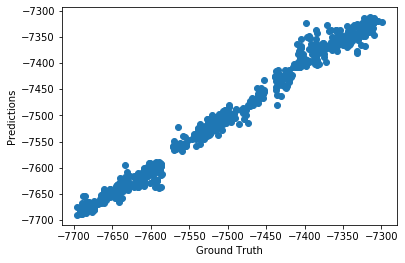

In [37]:
plt.scatter(y_validation, predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [38]:
sum(abs(y_validation - predictions))

8530.19141114588